# softmax regression
    https://www.tensorflow.org/versions/r1.0/get_started/mnist/beginners
    
    1. load in data from MNIST website and save to local directory. 
       Now have 4 files(training: images  and labels, testing: images and labels)
    
        Extracting MNIST_data/train-images-idx3-ubyte.gz
        Extracting MNIST_data/train-labels-idx1-ubyte.gz
        Extracting MNIST_data/t10k-images-idx3-ubyte.gz
        Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

    2. read in memory.
    
    3. one-hot vector: a vector which is 0 in most dimensions, and 1 in a single dimension. 
    
        For example, 3 would be [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. 
    
    
        Consequently, mnist.train.labels is a [55000, 10] array of floats.
    
   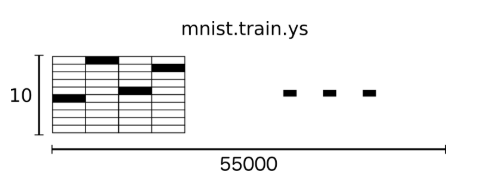
       



In [2]:
# https://www.tensorflow.org/versions/r1.0/get_started/mnist/beginners


from tensorflow.examples.tutorials.mnist import input_data              #load in data 
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)          # save to local disk and read in

# tf.logging.set_verbosity(tf.logging.WARN)
# new version
# https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/01_Simple_Linear_Model.ipynb
# from mnist import MNIST
# data = MNIST(data_dir="data/MNIST/")   

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## image: 
Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:

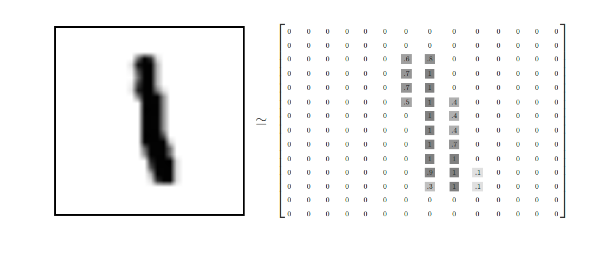

## We can flatten this array into a vector of 28x28 = 784 numbers.



The result is that mnist.train.images is a tensor (an n-dimensional array) with a shape of [55000, 784]


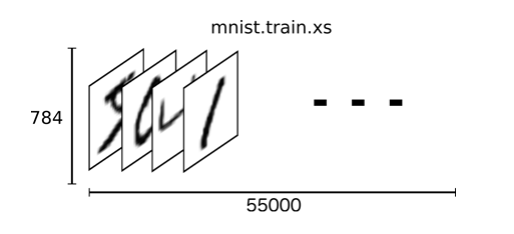

In [3]:
import tensorflow as tf

sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, [None, 784]) # many row => many images, 784 => each image is one-d vector by row 

W = tf.Variable(tf.zeros([784, 10]))  # weight (column) = 784 , but we have 10 digitals 0-9, then we 10 sets of weights
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)    # prediction XxW + b

y_ = tf.placeholder(tf.float32, [None, 10]) # actual label
 




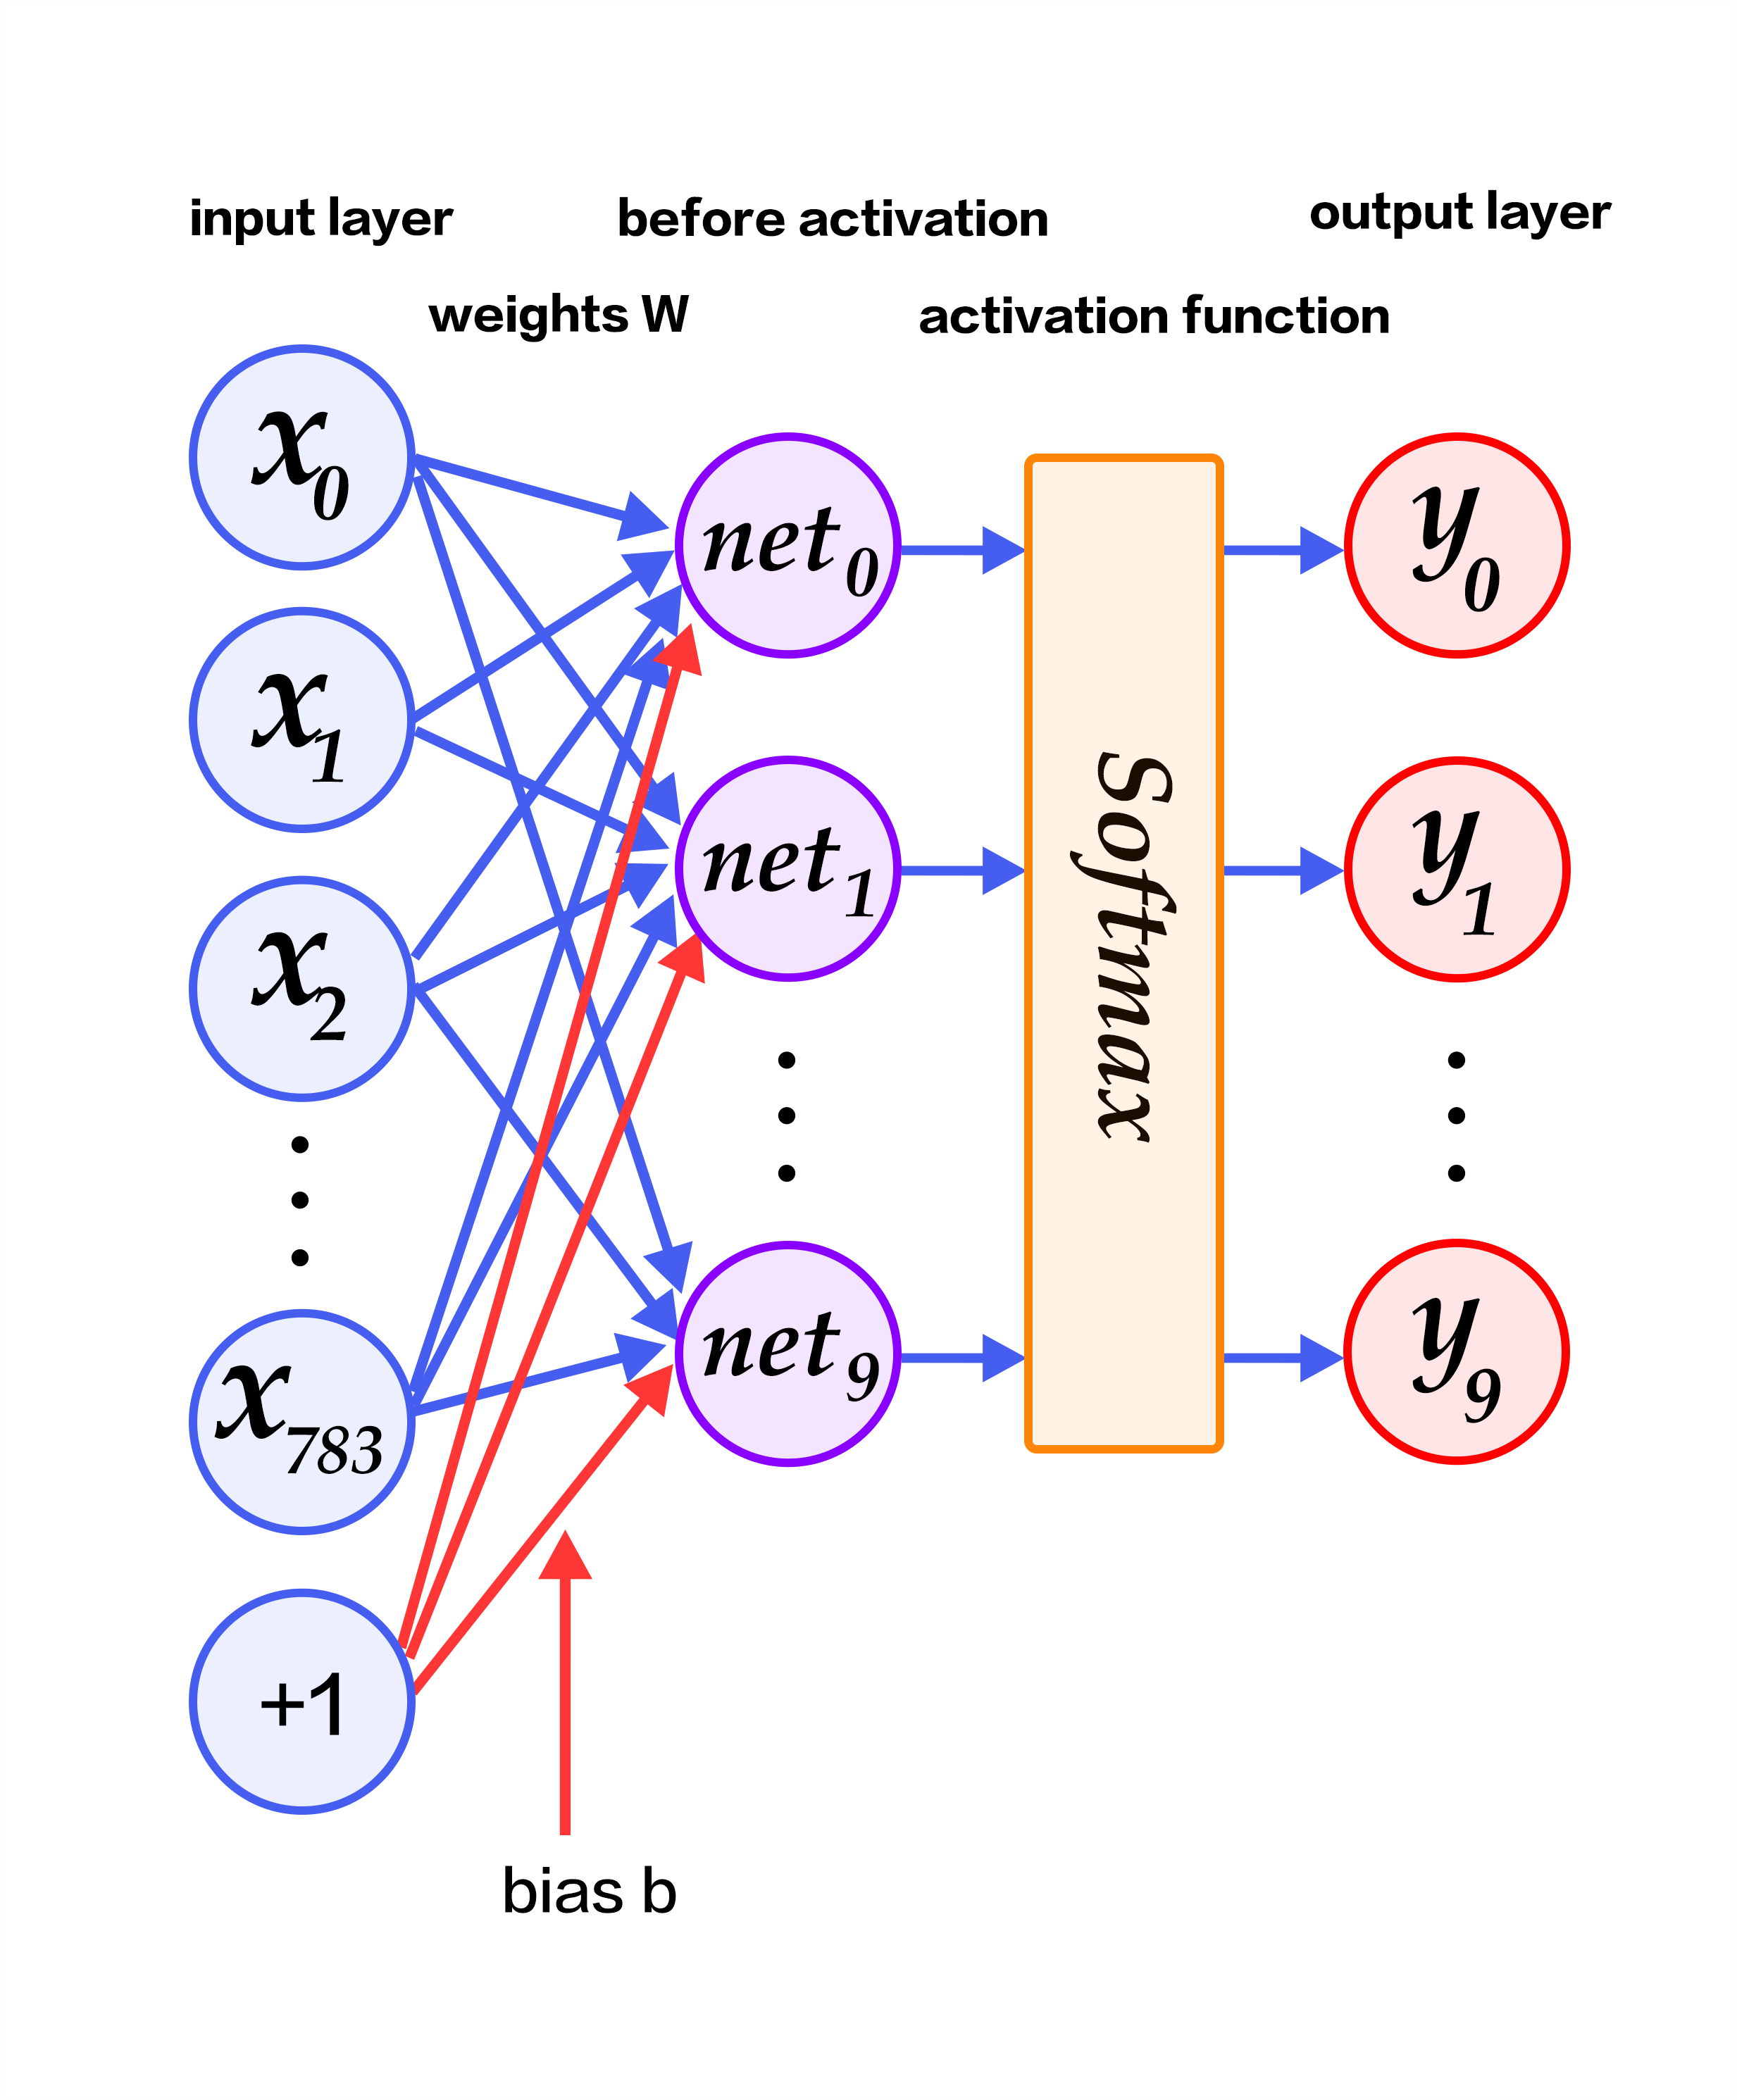


## find the optimal W and b by:
## minizing the cost function: entropy 
## using gradient descent
 

In [4]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) # cost function

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)  # optimization: gradientDescent



# Do 500 times and printout the result

In [5]:
tf.global_variables_initializer().run()


for _ in range(500):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))           # compared the predicted y and actual y_ 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy=", sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})) # using testing data 



Accuracy= 0.9165
